## PROJET_4            Etape_2:  ANALYSE  EXPLORATOIRE 


### Lecture des données 

In [32]:
# from google.colab import drive
# drive.mount('/content/drive')

In [33]:
#!pip install pingouin

# Nouvelle section

In [34]:
# IMPORT LIBRAIRIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import time
import missingno as msno
import pingouin as pg
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn import decomposition
from sklearn import preprocessing
%matplotlib inline

In [35]:
# CONFIGURATION DES OPTIONS
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

In [36]:
# LECTURE DONNEES
# path='/content/drive/MyDrive/df_reduit_cleaned.csv'
path='df15_16_clean.csv'
df=pd.read_csv(path)

### Preliminaires

In [37]:
# DIMENSION DU DATASET
df.shape

(1975, 17)

In [38]:
# AFFICHAGE NOMS DE VARIABLES
df.columns

Index(['Unnamed: 0', 'Longitude', 'Latitude', 'Address',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'CouncilDistrictCode',
       'Neighborhood', 'NumberofBuildings', 'YearBuilt', 'ZipCode',
       'PropertyGFATotal', 'Electricity(kBtu)_Prc', 'NaturalGas(kBtu)_Prc',
       'SteamUse(kBtu)_Prc', 'ENERGYSTARScore', 'TotalGHGEmissions',
       'SiteEnergyUse(kBtu)'],
      dtype='object')

In [39]:
# CHOIX INDEX
df.set_index('Unnamed: 0',inplace=True)
df.head(3)

,Longitude,Latitude,Address,GHGEmissionsIntensity(kgCO2e/ft2),CouncilDistrictCode,Neighborhood,NumberofBuildings,YearBuilt,ZipCode,PropertyGFATotal,Electricity(kBtu)_Prc,NaturalGas(kBtu)_Prc,SteamUse(kBtu)_Prc,ENERGYSTARScore,TotalGHGEmissions,SiteEnergyUse(kBtu)
Unnamed: 0,,,,,,,,,,,,,,,,
1,-122.32,47.55,6100 CORSON AVE S,1.88,2,GREATER DUWAMISH,1.00,1992,98108.00,22452,0.44,0.56,0.00,78.00,44.71,1354219.00
3,-122.33,47.63,800 FAIRVIEW AVE N,1.64,3,LAKE UNION,1.00,1990,98109.00,282863,0.57,0.43,0.00,40.00,509.18,18829136.00
4,-122.34,47.57,3670 E MARGINAL WAY S,0.28,2,GREATER DUWAMISH,1.00,2008,98134.00,63225,1.00,0.00,0.00,100.00,46.15,6619941.00


In [40]:
df.head(3)

,Longitude,Latitude,Address,GHGEmissionsIntensity(kgCO2e/ft2),CouncilDistrictCode,Neighborhood,NumberofBuildings,YearBuilt,ZipCode,PropertyGFATotal,Electricity(kBtu)_Prc,NaturalGas(kBtu)_Prc,SteamUse(kBtu)_Prc,ENERGYSTARScore,TotalGHGEmissions,SiteEnergyUse(kBtu)
Unnamed: 0,,,,,,,,,,,,,,,,
1,-122.32,47.55,6100 CORSON AVE S,1.88,2,GREATER DUWAMISH,1.00,1992,98108.00,22452,0.44,0.56,0.00,78.00,44.71,1354219.00
3,-122.33,47.63,800 FAIRVIEW AVE N,1.64,3,LAKE UNION,1.00,1990,98109.00,282863,0.57,0.43,0.00,40.00,509.18,18829136.00
4,-122.34,47.57,3670 E MARGINAL WAY S,0.28,2,GREATER DUWAMISH,1.00,2008,98134.00,63225,1.00,0.00,0.00,100.00,46.15,6619941.00


In [41]:
df.tail(3)

,Longitude,Latitude,Address,GHGEmissionsIntensity(kgCO2e/ft2),CouncilDistrictCode,Neighborhood,NumberofBuildings,YearBuilt,ZipCode,PropertyGFATotal,Electricity(kBtu)_Prc,NaturalGas(kBtu)_Prc,SteamUse(kBtu)_Prc,ENERGYSTARScore,TotalGHGEmissions,SiteEnergyUse(kBtu)
Unnamed: 0,,,,,,,,,,,,,,,,
3338,-122.32,47.54,6518 Ellis,3.03,2,GREATER DUWAMISH,1.00,1955,98108.00,52085,0.20,0.80,0.00,37.00,157.70,3605855.50
3339,-122.30,47.53,7277 Perimeter Rd.,5.39,2,GREATER DUWAMISH,1.00,1929,98108.00,24990,0.49,0.51,0.00,9.00,134.80,4420650.50
3347,-122.31,47.59,1701 20th Ave South,0.21,3,GREATER DUWAMISH,1.00,2015,98144.00,45000,1.00,0.00,0.00,77.00,9.24,1325972.75


In [42]:
df.sample(5)

,Longitude,Latitude,Address,GHGEmissionsIntensity(kgCO2e/ft2),CouncilDistrictCode,Neighborhood,NumberofBuildings,YearBuilt,ZipCode,PropertyGFATotal,Electricity(kBtu)_Prc,NaturalGas(kBtu)_Prc,SteamUse(kBtu)_Prc,ENERGYSTARScore,TotalGHGEmissions,SiteEnergyUse(kBtu)
Unnamed: 0,,,,,,,,,,,,,,,,
2024,-122.37,47.53,2600 SW HOLDEN ST,2.26,1,DELRIDGE,1.00,1970,98126.00,43615,0.43,0.57,0.00,89.00,104.45,3118304.00
2368,-122.29,47.69,8500 35TH AVE NE,0.52,5,NORTHEAST,1.00,1952,98115.00,26853,0.86,0.14,0.00,63.00,19.30,1452804.00
1464,-122.32,47.52,860 South Cambridge Street,2.77,1,GREATER DUWAMISH,1.00,1981,98108.00,28920,0.16,0.84,0.00,50.00,80.09,1750419.00
629,-122.34,47.71,11616 AURORA AVE N,2.90,5,NORTHWEST,1.00,1995,98133.00,101830,0.55,0.45,0.00,60.00,295.12,10713006.00
285,-122.34,47.61,1501 4th Ave,1.05,7,DOWNTOWN,1.00,1985,98101.00,755000,0.83,0.16,0.01,72.00,793.05,52226204.00


#### Valeurs manquantes

<AxesSubplot:>

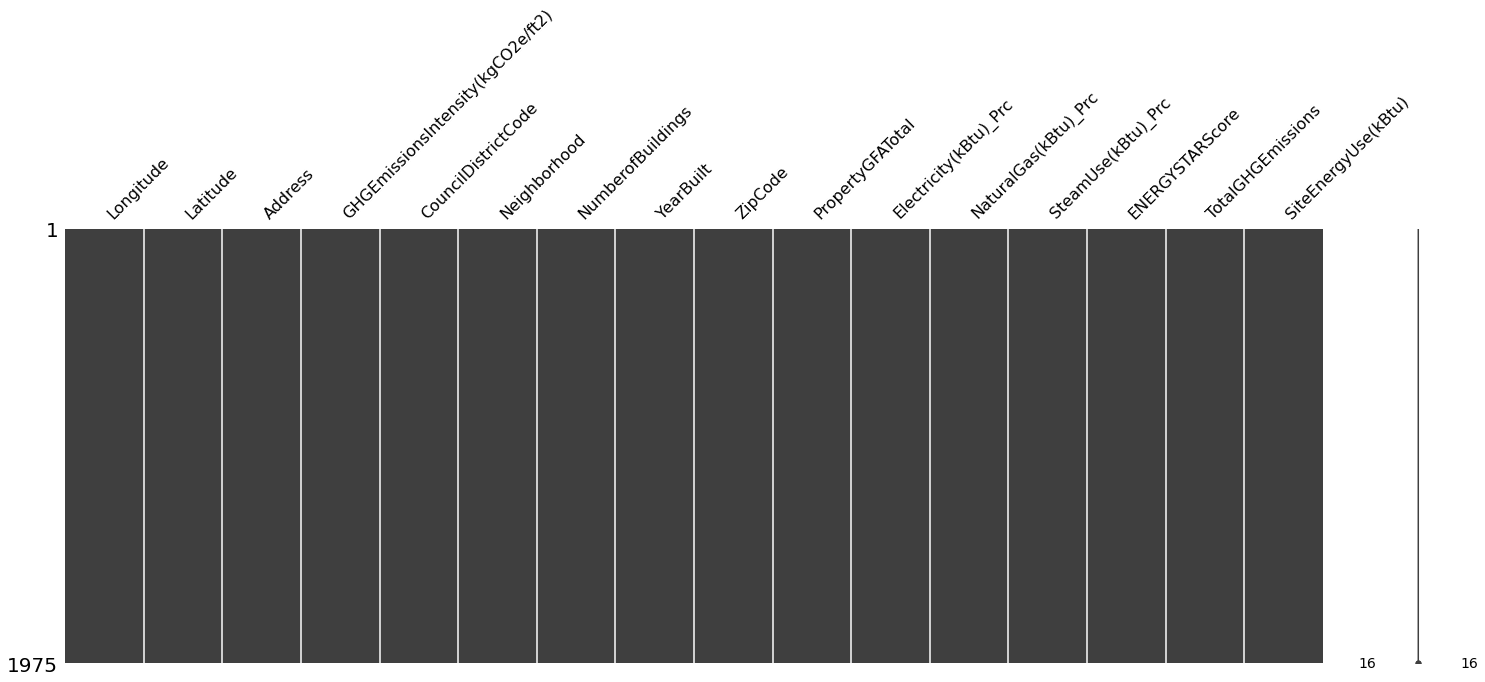

In [43]:
# GRAPHIQUE VALEURS MANQUANTES
msno.matrix(df,figsize=(25, 8))

<AxesSubplot:>

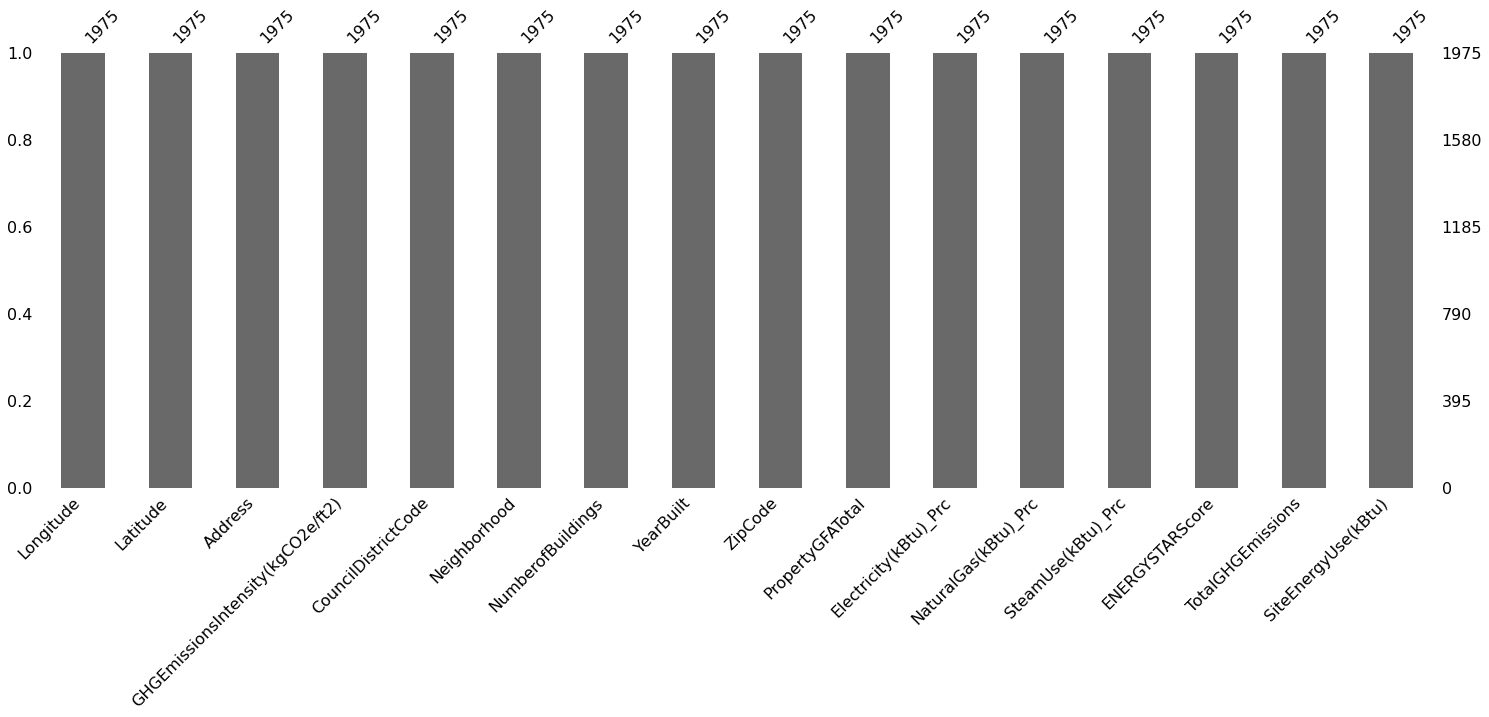

In [44]:
# GRAPHIQUE BARPLOT NOMBRE DE VALEURS PAR VARIABLE
msno.bar(df,figsize=(25, 8))

In [45]:
# TYPE DES VARIABLES
df.dtypes

Longitude                            float64
Latitude                             float64
Address                               object
GHGEmissionsIntensity(kgCO2e/ft2)    float64
CouncilDistrictCode                    int64
Neighborhood                          object
NumberofBuildings                    float64
YearBuilt                              int64
ZipCode                              float64
PropertyGFATotal                       int64
Electricity(kBtu)_Prc                float64
NaturalGas(kBtu)_Prc                 float64
SteamUse(kBtu)_Prc                   float64
ENERGYSTARScore                      float64
TotalGHGEmissions                    float64
SiteEnergyUse(kBtu)                  float64
dtype: object

REMARQUE

La variable Neighborhood fera l'objet d'encodage(étape ultérieure)



In [46]:
# NOMBRE DE VALEURS NON NULLES ET TYPE
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 1 to 3347
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Longitude                          1975 non-null   float64
 1   Latitude                           1975 non-null   float64
 2   Address                            1975 non-null   object 
 3   GHGEmissionsIntensity(kgCO2e/ft2)  1975 non-null   float64
 4   CouncilDistrictCode                1975 non-null   int64  
 5   Neighborhood                       1975 non-null   object 
 6   NumberofBuildings                  1975 non-null   float64
 7   YearBuilt                          1975 non-null   int64  
 8   ZipCode                            1975 non-null   float64
 9   PropertyGFATotal                   1975 non-null   int64  
 10  Electricity(kBtu)_Prc              1975 non-null   float64
 11  NaturalGas(kBtu)_Prc               1975 non-null   float

### Analyses Univariées 

In [47]:
#COLONNES RETENUES
col2=df.columns.to_list()
col2

['Longitude',
 'Latitude',
 'Address',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'CouncilDistrictCode',
 'Neighborhood',
 'NumberofBuildings',
 'YearBuilt',
 'ZipCode',
 'PropertyGFATotal',
 'Electricity(kBtu)_Prc',
 'NaturalGas(kBtu)_Prc',
 'SteamUse(kBtu)_Prc',
 'ENERGYSTARScore',
 'TotalGHGEmissions',
 'SiteEnergyUse(kBtu)']

In [48]:
df.dtypes

Longitude                            float64
Latitude                             float64
Address                               object
GHGEmissionsIntensity(kgCO2e/ft2)    float64
CouncilDistrictCode                    int64
Neighborhood                          object
NumberofBuildings                    float64
YearBuilt                              int64
ZipCode                              float64
PropertyGFATotal                       int64
Electricity(kBtu)_Prc                float64
NaturalGas(kBtu)_Prc                 float64
SteamUse(kBtu)_Prc                   float64
ENERGYSTARScore                      float64
TotalGHGEmissions                    float64
SiteEnergyUse(kBtu)                  float64
dtype: object

#### Variables numériques

In [49]:
numerique_columns = df.select_dtypes(exclude = 'O').columns.to_list()

In [50]:
numerique_columns

['Longitude',
 'Latitude',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'CouncilDistrictCode',
 'NumberofBuildings',
 'YearBuilt',
 'ZipCode',
 'PropertyGFATotal',
 'Electricity(kBtu)_Prc',
 'NaturalGas(kBtu)_Prc',
 'SteamUse(kBtu)_Prc',
 'ENERGYSTARScore',
 'TotalGHGEmissions',
 'SiteEnergyUse(kBtu)']

##### Description

In [51]:
df[numerique_columns].describe()
  

,Longitude,Latitude,GHGEmissionsIntensity(kgCO2e/ft2),CouncilDistrictCode,NumberofBuildings,YearBuilt,ZipCode,PropertyGFATotal,Electricity(kBtu)_Prc,NaturalGas(kBtu)_Prc,SteamUse(kBtu)_Prc,ENERGYSTARScore,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1975.00,1975.00,1975.00,1975.00,1975.00,1975.00,1975.00,1975.00,1975.00,1975.00,1975.00,1975.00,1975.00,1975.00
mean,-122.33,47.62,1.24,4.49,1.01,1962.73,98116.23,128488.53,0.73,0.25,0.02,63.03,174.91,8320249.95
std,0.02,0.05,1.64,2.20,0.38,31.95,17.16,212661.19,0.26,0.26,0.09,28.63,671.03,21661540.41
min,-122.41,47.51,-0.02,1.00,0.00,1900.00,98020.00,16300.00,0.00,0.00,0.00,1.00,-0.80,56493.00
25%,-122.34,47.59,0.23,2.00,1.00,1936.50,98104.00,30840.00,0.53,0.00,0.00,43.50,19.29,1243544.50
50%,-122.33,47.61,0.65,4.00,1.00,1967.00,98109.00,53002.00,0.77,0.16,0.00,69.00,48.74,2721646.00
75%,-122.32,47.65,1.58,7.00,1.00,1988.00,98122.00,123061.00,1.00,0.45,0.00,88.00,135.39,7538780.00
max,-122.26,47.73,16.91,7.00,9.00,2015.00,98199.00,1952220.00,1.00,1.00,0.70,100.00,12307.16,295812640.00


NB: Différence d'échelle importante: standardisation ultérieure

##### Graphiques: Histogrammes Boxplot

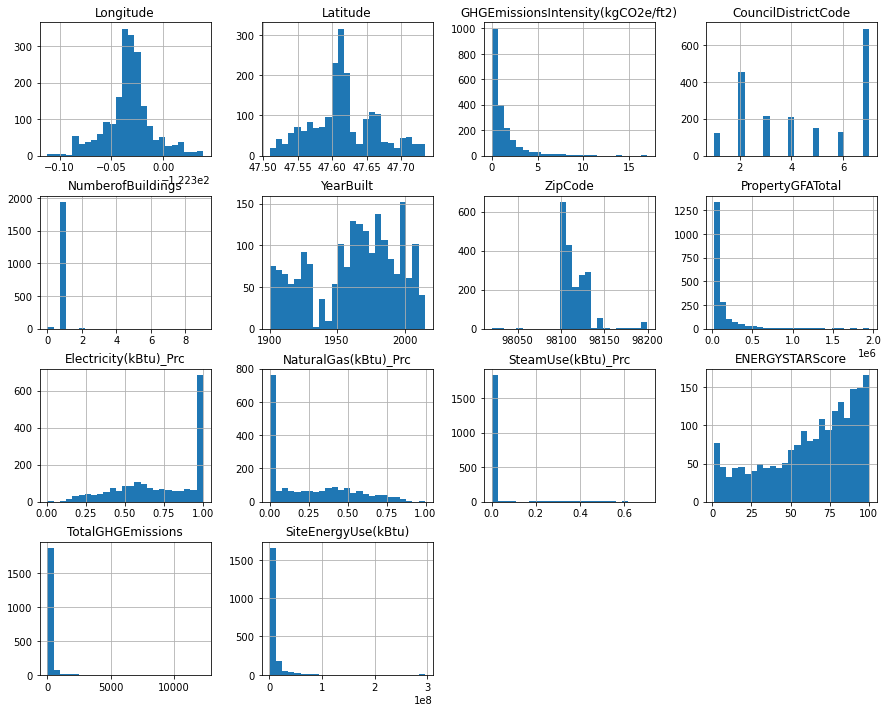

In [52]:
# HISTOGRAMMES
df[numerique_columns].hist(figsize=(15,12),bins=25)
plt.show()

On remarque des différences d'échelle très prononcées

<AxesSubplot:>

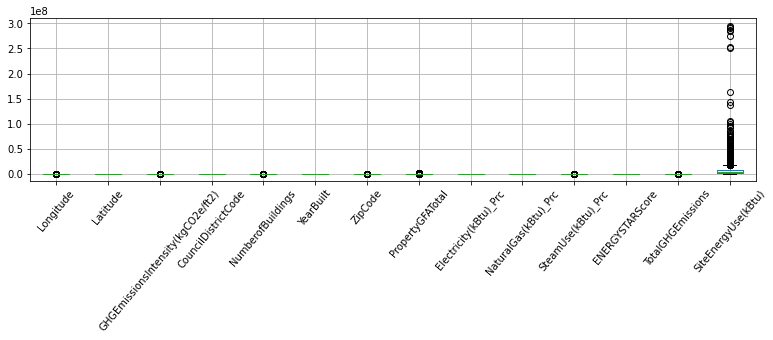

In [53]:
# BOXPLOT
df[numerique_columns].boxplot(figsize=(13,3),rot=50)



##### Tendances centrales

In [54]:
# STATISTIQUE TENDANCES  CENTRALES 

df[numerique_columns].agg(["mean",'median','skew','kurt']).T

,mean,median,skew,kurt
Longitude,-122.33,-122.33,-0.00,1.22
Latitude,47.62,47.61,0.22,-0.13
GHGEmissionsIntensity(kgCO2e/ft2),1.24,0.65,2.91,12.21
CouncilDistrictCode,4.49,4.00,-0.09,-1.59
NumberofBuildings,1.01,1.00,14.52,252.67
YearBuilt,1962.73,1967.00,-0.39,-0.95
ZipCode,98116.23,98109.00,2.05,8.15
PropertyGFATotal,128488.53,53002.00,4.26,22.64
Electricity(kBtu)_Prc,0.73,0.77,-0.52,-0.95
NaturalGas(kBtu)_Prc,0.25,0.16,0.68,-0.78


#### Variables qualitatives

In [55]:
categ_columns = df.select_dtypes(include = 'O').columns.to_list()
categ_columns

['Address', 'Neighborhood']

In [56]:
# NOMBRE D'OCCURRENCE PAR VARIABLE QUALITATIVE
df[categ_columns].nunique()

Address         1869
Neighborhood      18
dtype: int64

<AxesSubplot:>

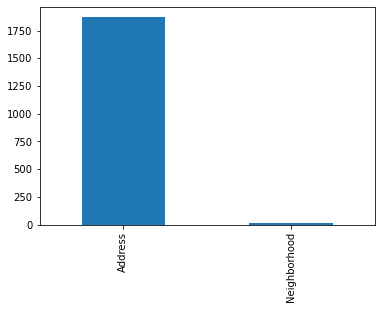

In [57]:
#GRAPHIQUE NOMBRE D'OCCURRENCE PAR VARIABLE QUALITATIVE
df[categ_columns].nunique().plot(kind='bar')

##### Graphique Barplot et Pie

In [58]:
# NOMBRE DE VALEURS PAR VARIABLE QUANTITATIVE
df[categ_columns].count()

Address         1975
Neighborhood    1975
dtype: int64

<AxesSubplot:>

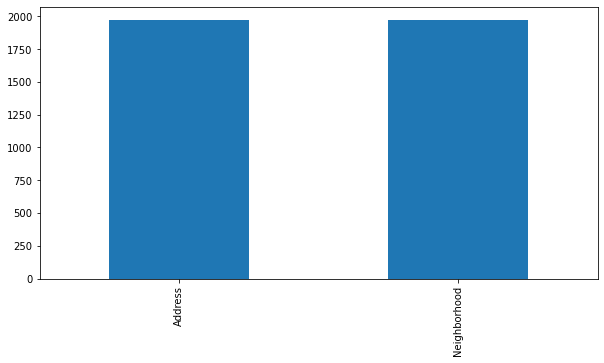

In [59]:
plt.figure(figsize=(10,5))
df[categ_columns].count().plot(kind='bar')

<AxesSubplot:ylabel='None'>

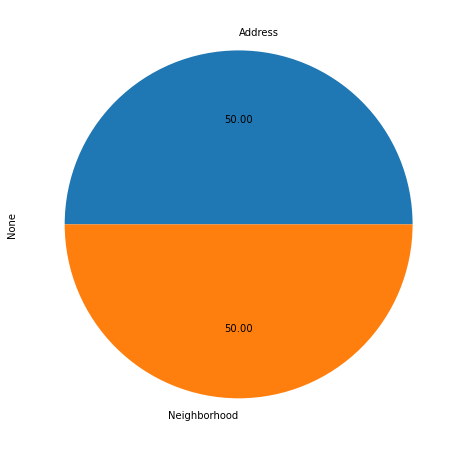

In [60]:
# POURCENTAGE DE REMPLISSAGE DE VARIABLES
plt.figure(figsize=(12,8))
df[categ_columns].count().plot(kind='pie',autopct='%.2f')

##### Variable 'Neighborhood'

In [61]:
# REPARTITION DES OBSERVATIONS SELON 'nutrition_grade_fr'
df['Neighborhood'].value_counts()

DOWNTOWN                 492
GREATER DUWAMISH         408
LAKE UNION               201
MAGNOLIA / QUEEN ANNE    165
NORTHEAST                147
EAST                     132
NORTHWEST                105
BALLARD                   69
NORTH                     67
DELRIDGE                  49
CENTRAL                   48
SOUTHEAST                 43
SOUTHWEST                 35
Northwest                  4
Ballard                    3
North                      3
Delridge                   2
Central                    2
Name: Neighborhood, dtype: int64

/home/pcb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

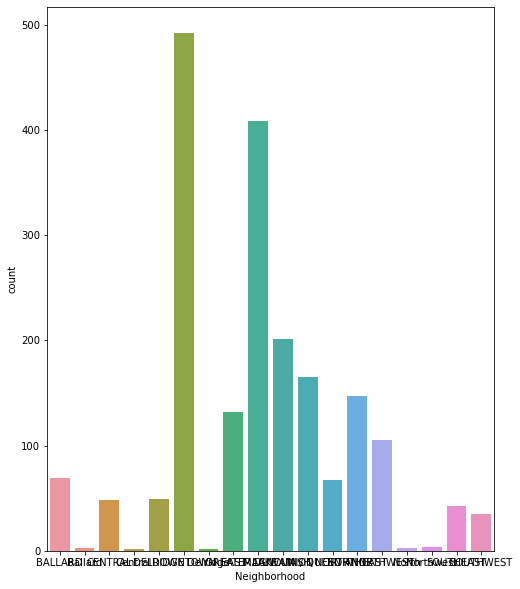

In [62]:
#CATEGORIE 'Neighborhood'  GRAPHIQUE
plt.subplots(figsize=(8,10))
sns.countplot(df['Neighborhood'].sort_values(),orient="h")


<AxesSubplot:ylabel='Neighborhood'>

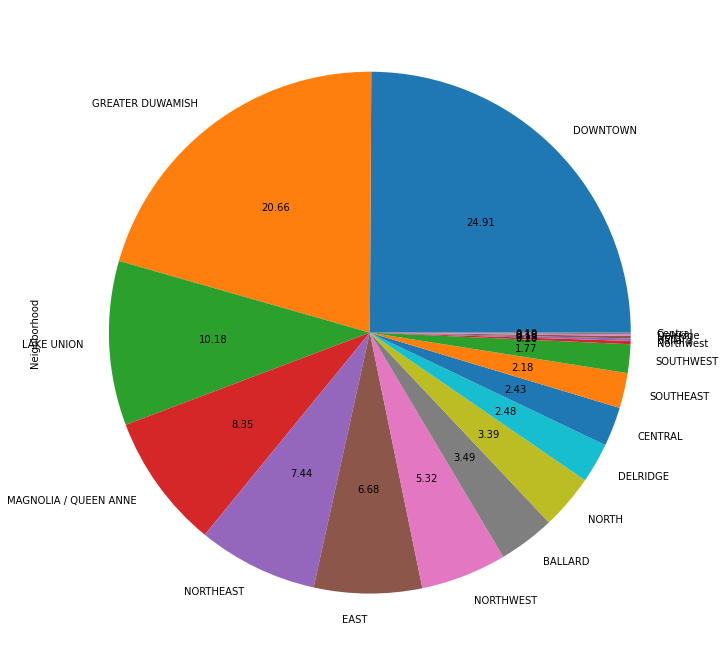

In [63]:
#SOIT SOUS FORME DE PIE-CHART
plt.figure(figsize=(12,12))
df['Neighborhood'].value_counts().plot(kind='pie', autopct='%.2f')

### Analyses Bivariées 

#### Quantitative X Guantitative

##### Pairplot

<Figure size 827x1169 with 0 Axes>

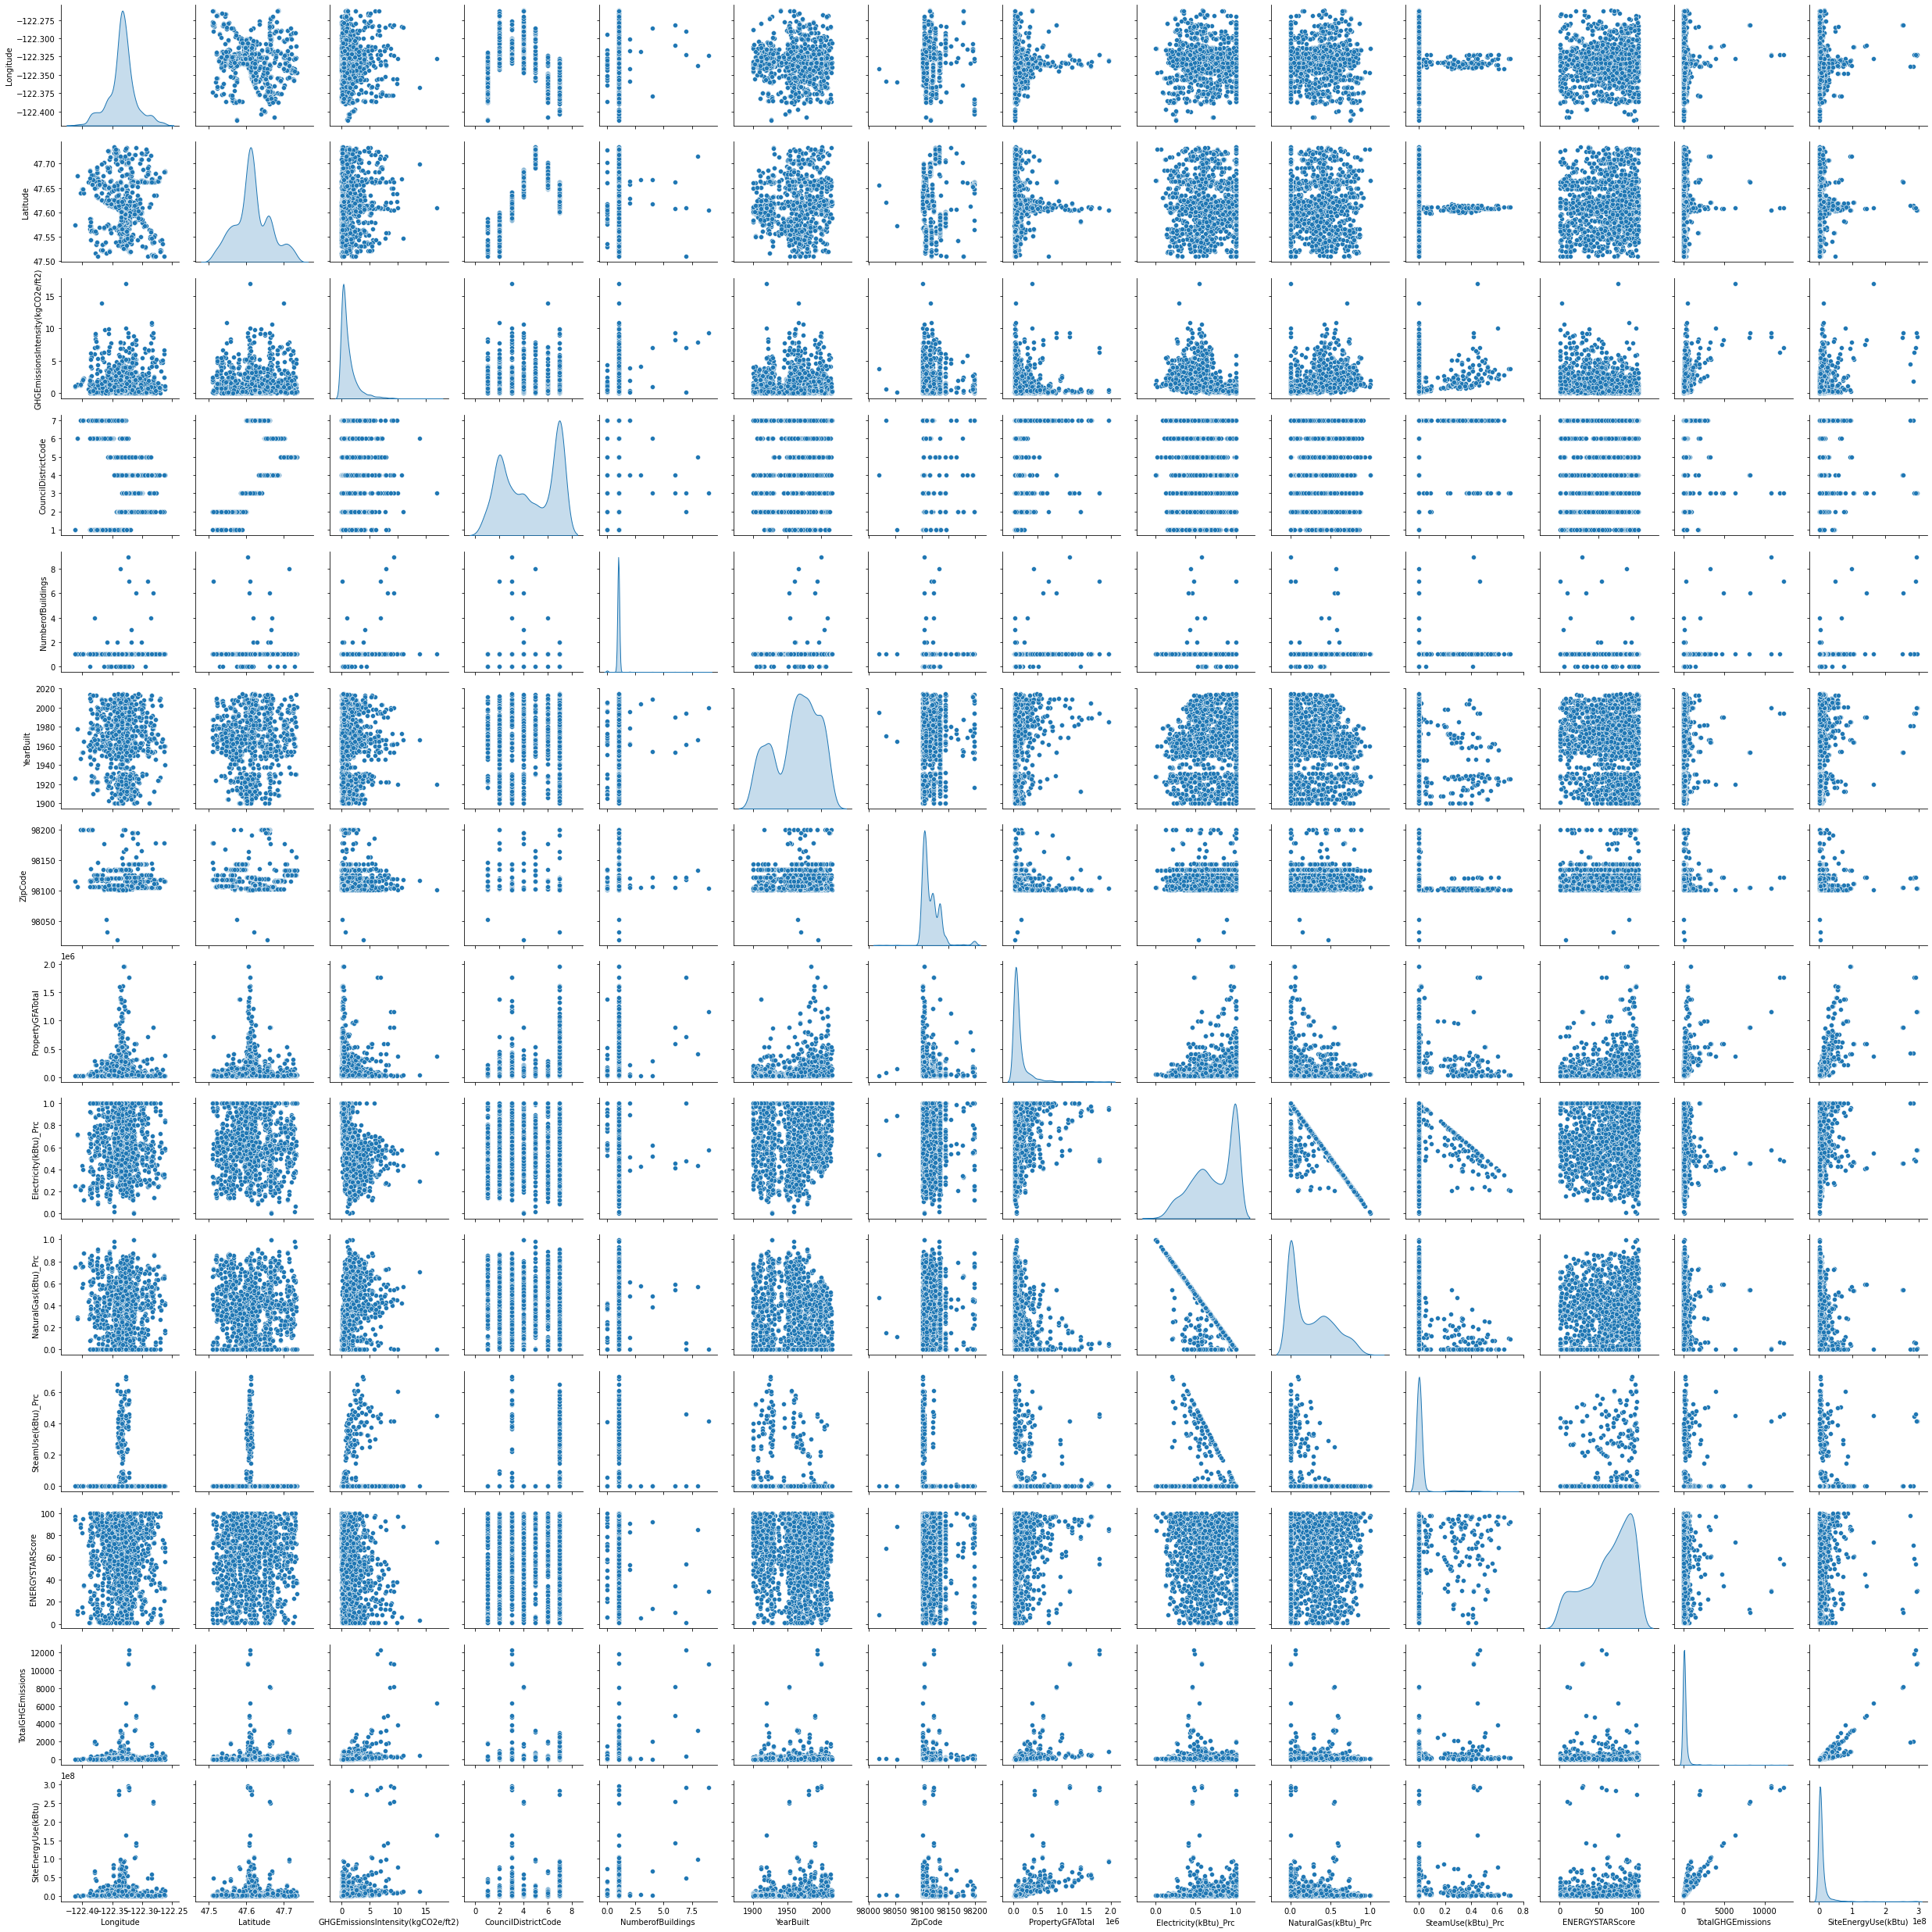

In [64]:
start_time = time.time()
plt.figure(figsize=(8.27,11.69),dpi=100)
sns.pairplot(df,diag_kind='kde')
plt.show() 

REMARQUES



#### Quantitative X Qualitative

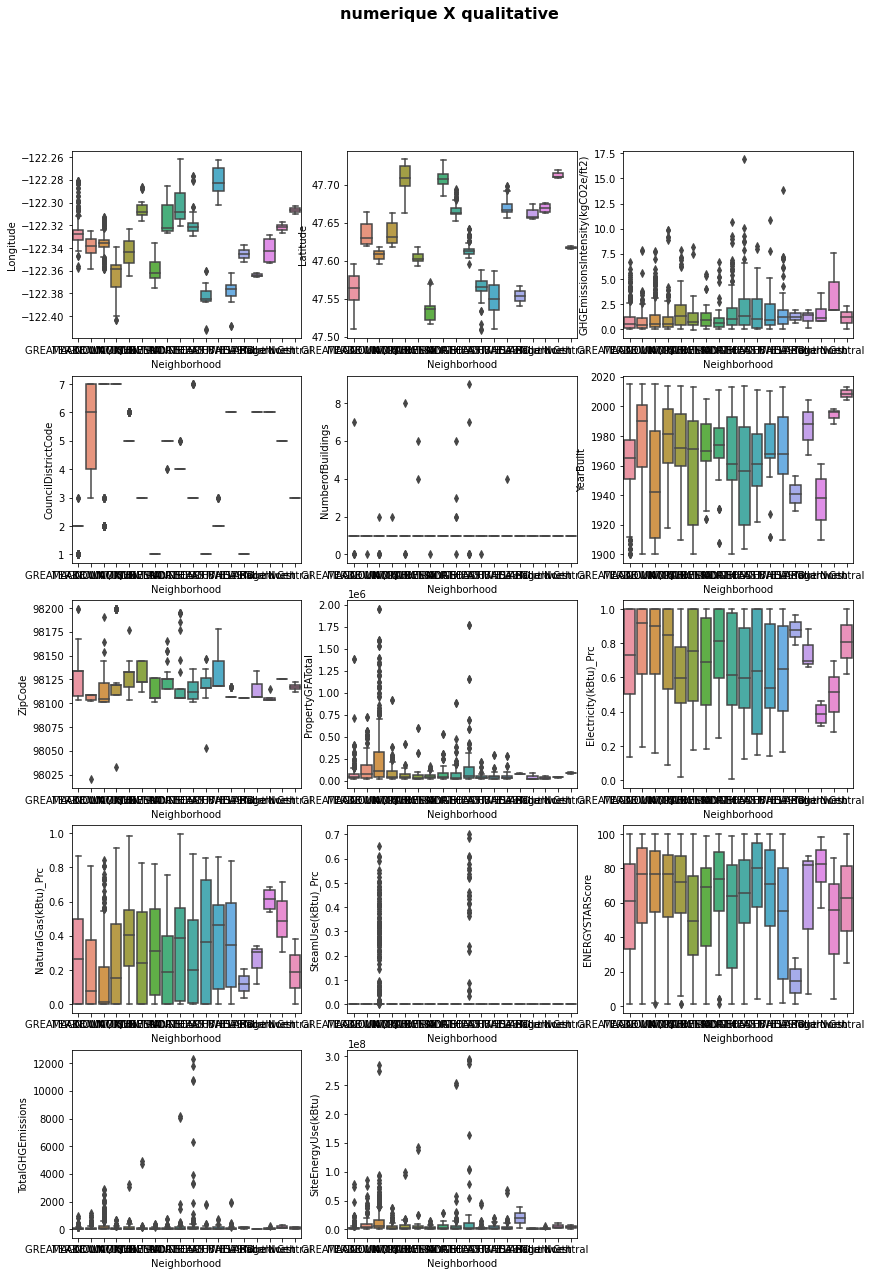

In [70]:
#
fig = plt.figure(figsize=(14,20))
for k, col in enumerate(numerique_columns,1):
        ax = fig.add_subplot(5,3,k)
        sns.boxplot(data=df, x='Neighborhood', y=col, ax=ax)
plt.suptitle('numerique X qualitative', fontsize=16,fontweight='bold')
             
plt.show()

**CONCLUSION**



In [71]:
# FAISONS le Test ANOVA pour confirmer l hypothese d une relation entre  
# fat_100 et nutrition_grade_fr

 **ANOVA**?

**Entre fat_100g et nutrition_grade_fr**

In [67]:
# # Entre fat_100g et nutrition_grade_fr
# aov = pg.anova(dv='fat_100g', between='nutrition_grade_fr', data=df,detailed=True)
# aov.round(3)   

#### Qualitative X Qualitative

In [68]:
# # VERIFICATION AVEC LE TEST CHI-2

# #TABLEAU DE CONTINGENCE
# data=df
# X = "additives_fr"
# Y = "nutrition_grade_fr"
# cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
# cont


In [69]:
# # TEST DU CHI-2
# start = time.time()
# #------------------------------------------------

# tx = cont.loc[:,["Total"]]
# ty = cont.loc[["Total"],:]
# n = len(data)
# indep = tx.dot(ty) / n

# #ReMplacement des valeurs nulles par 0
# c = cont.fillna(0)

# measure = (c-indep)**2/indep
# xi_n = measure.sum().sum()
# table = measure/xi_n
# plt.figure(figsize=(15,15))
# sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
# plt.show()

# #-------------------------------------------
# end = time.time()
# print(end - start)

#### Correlation

<AxesSubplot:>

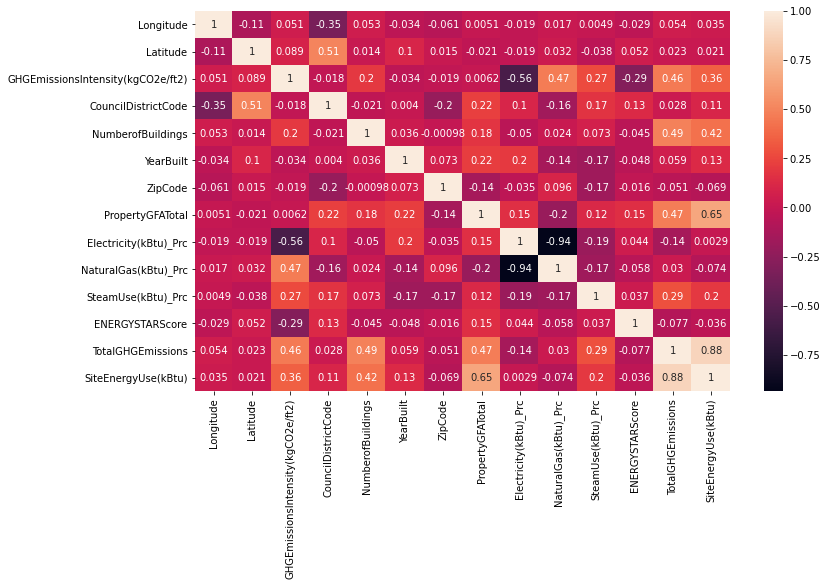

In [72]:
#AFFICHAGE GRAPHIQUE DES CORRELATIONS
corr=df.corr()
plt.subplots(figsize=(12,7))
sns.heatmap(corr,annot=True)


REMARQUES



In [73]:
# NOMBRE D OCCURRENCE POUR CHAQUE VARIABLE
df.nunique()

Longitude                            1810
Latitude                             1879
Address                              1869
GHGEmissionsIntensity(kgCO2e/ft2)     429
CouncilDistrictCode                     7
Neighborhood                           18
NumberofBuildings                       9
YearBuilt                             110
ZipCode                                40
PropertyGFATotal                     1041
Electricity(kBtu)_Prc                1413
NaturalGas(kBtu)_Prc                 1345
SteamUse(kBtu)_Prc                    150
ENERGYSTARScore                       100
TotalGHGEmissions                    1865
SiteEnergyUse(kBtu)                  1974
dtype: int64

<AxesSubplot:ylabel='None'>

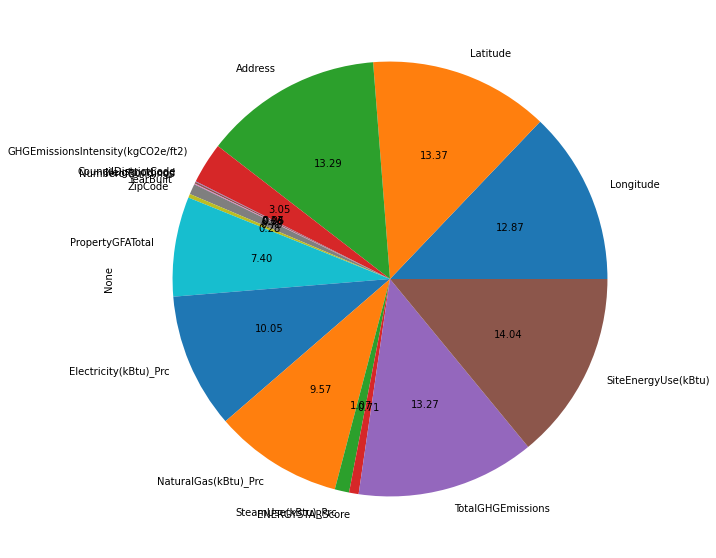

In [74]:
# REPRESENTATION GRAPHIQUE
df.nunique().plot(kind='pie',figsize=(10,10), autopct='%.2f')